In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Stunting_Dataset.csv')

In [4]:
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [6]:
df = df.rename(columns={'Age': 'Age_Per_Month'})
df = df.rename(columns={'Birth Weight': 'Birth_Weight'})
df = df.rename(columns={'Birth Length': 'Birth_Length'})
df = df.rename(columns={'Body Weight': 'Body_Weight'})
df = df.rename(columns={'Body Length': 'Body_Length'})

In [7]:
# Menggunakan one-hot encoding dengan nilai 0 dan 1
df['Breastfeeding'] = df['Breastfeeding'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Stunting'] = df['Stunting'].apply(lambda x: 1 if x == 'Yes' else 0)

# Mengubah tipe data menjadi int64
df['Stunting'] = df['Stunting'].astype('int64')
df['Breastfeeding'] = df['Breastfeeding'].astype('int64')

In [8]:
df.head(10)

,Gender,Age_Per_Month,Birth_Weight,Birth_Length,Body_Weight,Body_Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,0,0
1,Female,11,2.9,49,2.9,65.0,0,1
2,Male,16,2.9,49,8.5,72.2,0,1
3,Male,31,2.8,49,6.4,63.0,0,1
4,Male,15,3.1,49,10.5,49.0,0,1
5,Female,11,2.8,49,8.5,65.0,0,0
6,Male,35,2.8,49,10.5,72.2,0,1
7,Female,17,2.8,49,8.0,63.0,0,1
8,Female,10,2.7,49,8.4,73.5,0,0
9,Female,16,2.8,49,8.5,65.0,0,1


In [9]:
df.isna().sum()

Gender           0
Age_Per_Month    0
Birth_Weight     0
Birth_Length     0
Body_Weight      0
Body_Length      0
Breastfeeding    0
Stunting         0
dtype: int64

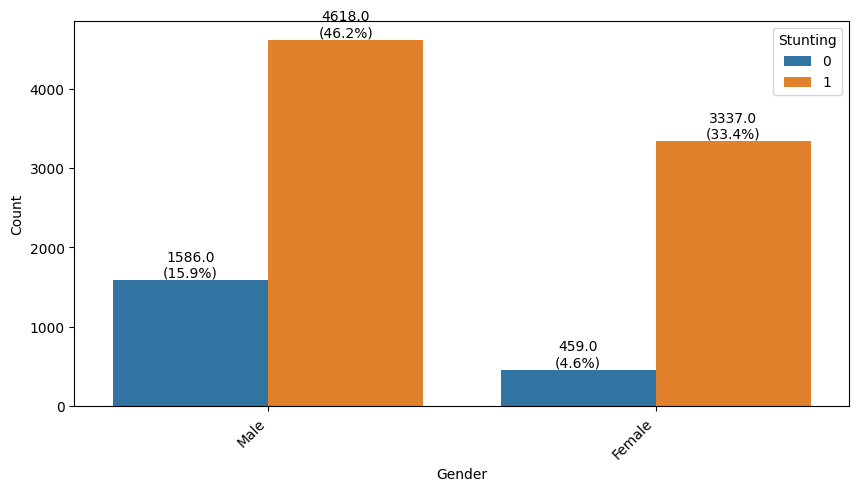

In [10]:
plt.figure(figsize=(10, 5))

# Menghitung jumlah total data untuk setiap kategori 'Gender'
total_counts = df['Gender'].value_counts()

# Membuat countplot dengan fitur 'Gender' sebagai sumbu x dan 'Stunting' sebagai hue
ax = sns.countplot(x='Gender', hue='Stunting', data=df)

# Menambahkan persentase dan angka jumlah di atas setiap baris
def annotate_perc_and_count(ax):
    total_height = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total_height * 100
        ax.annotate(f'{height}\n({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Memanggil fungsi untuk menambahkan persentase dan jumlah pada plot
annotate_perc_and_count(ax)

# Menyembunyikan nilai pada sumbu x agar tampilan menjadi lebih rapi
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Gender')
plt.ylabel('Count')

# Menampilkan legenda
plt.legend(title='Stunting')

# Tampilkan plot dengan persentase dan jumlah angka di atas setiap baris
plt.show()


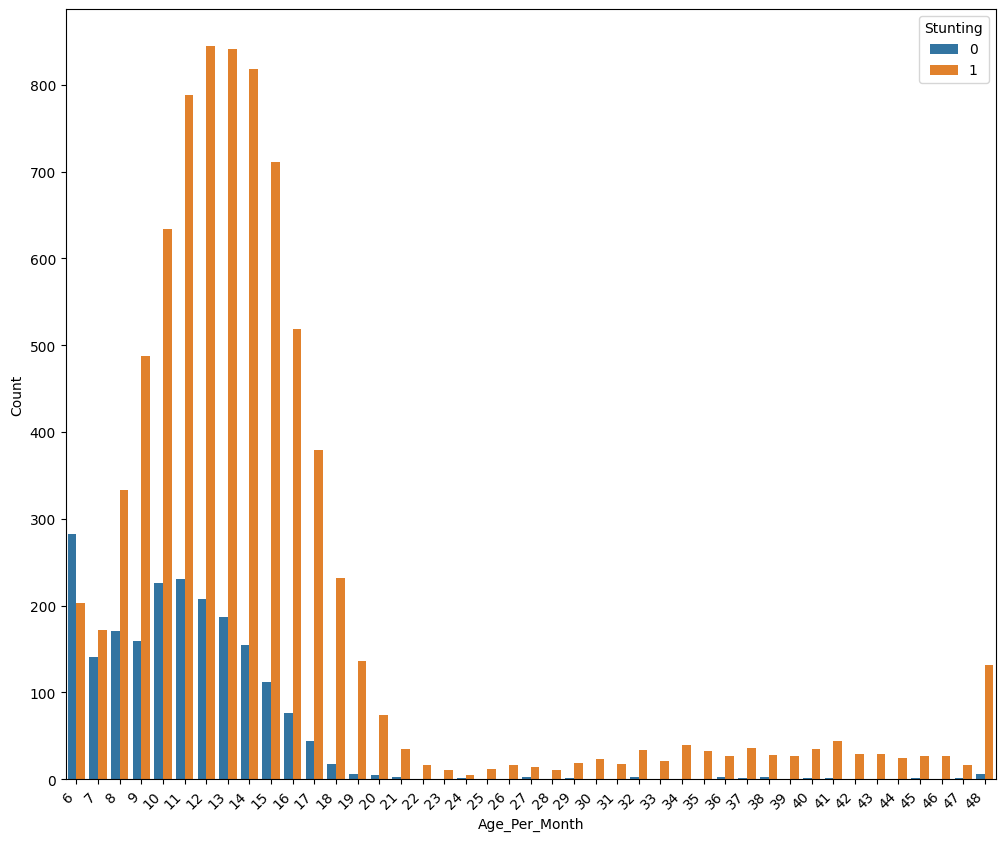

In [11]:
plt.figure(figsize=(12, 10))

# Membuat countplot dengan fitur 'Age_Per_Month' sebagai sumbu x dan 'Stunting' sebagai hue
ax = sns.countplot(x='Age_Per_Month', hue='Stunting', data=df)

# Menyembunyikan nilai pada sumbu x agar tampilan menjadi lebih rapi
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Age_Per_Month')
plt.ylabel('Count')

# Menampilkan legenda
plt.legend(title='Stunting')

# Tampilkan plot
plt.show()

<AxesSubplot:>

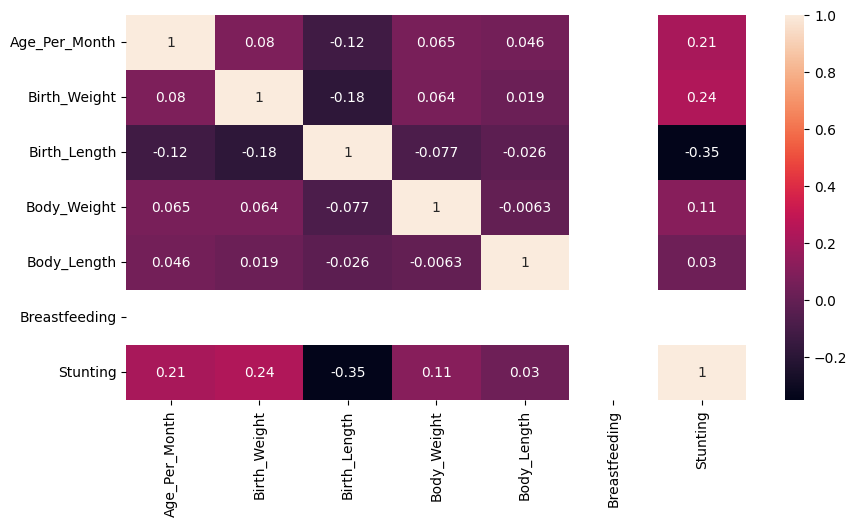

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [13]:
df = df.drop(columns=['Breastfeeding'])

In [14]:
df.columns

Index(['Gender', 'Age_Per_Month', 'Birth_Weight', 'Birth_Length',
       'Body_Weight', 'Body_Length', 'Stunting'],
      dtype='object')

<AxesSubplot:>

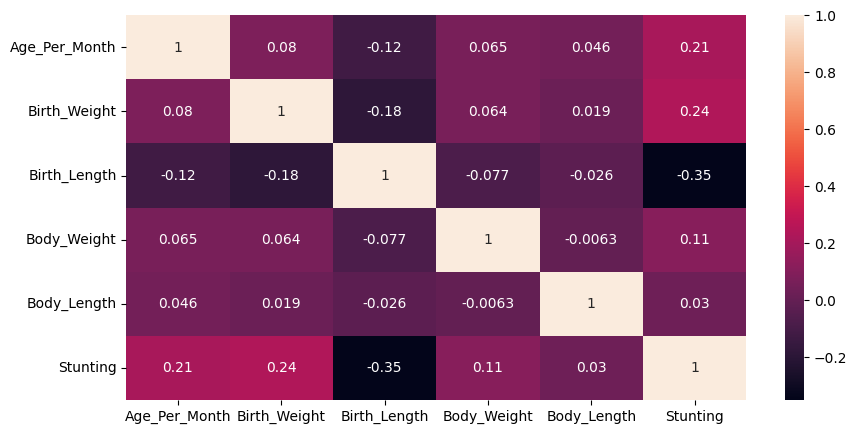

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [16]:
new_df = df

In [17]:
new_df['Stunting'].value_counts()

1    7955
0    2045
Name: Stunting, dtype: int64

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [19]:
X = new_df.drop(columns=['Gender','Stunting'])
y = new_df['Stunting']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2,random_state=42)
model.fit(X_train, y_train)

print("Train score:%.2f" %(model.score(X_train, y_train)))
print("Test score: %.2f" %(model.score(X_test, y_test)))
eval_classification(model)

Train score:0.85
Test score: 0.84
Accuracy (Test Set): 0.84
Precision (Test Set): 0.84
Recall (Test Set): 0.98
F1-Score (Test Set): 0.90
AUC (test-proba): 0.81
AUC (train-proba): 0.81


C:\Users\Pandiepie\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


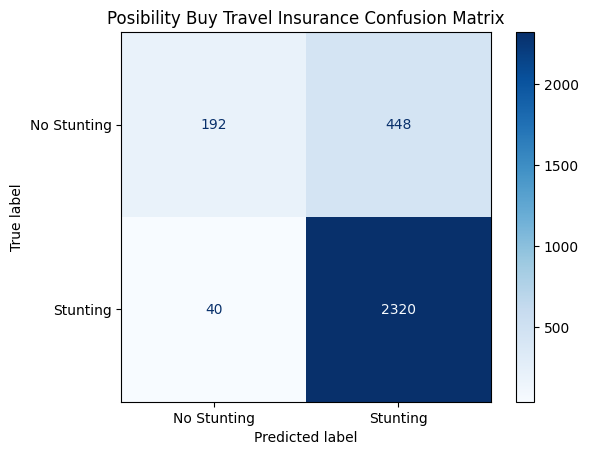

In [22]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['No Stunting', 'Stunting'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

In [28]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X_train, y_train)

# model = RandomForestClassifier(max_depth=2, random_state=42)
# model.fit(X_over_SMOTE, y_over_SMOTE)

# print("Train score:%.2f" %(model.score(X_train, y_train)))
# print("Test score: %.2f" %(model.score(X_test, y_test)))
# eval_classification(model)

In [24]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)

# model = RandomForestClassifier(random_state=42)
# model.fit(X_over, y_over)

# print("Train score:%.2f" %(model.score(X_train, y_train)))
# print("Test score: %.2f" %(model.score(X_test, y_test)))
# eval_classification(model)

In [29]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)

# model = RandomForestClassifier(random_state=42)
# model.fit(X_under, y_under)

# print("Train score:%.2f" %(model.score(X_train, y_train)))
# print("Test score: %.2f" %(model.score(X_test, y_test)))
# eval_classification(model)

In [29]:
# from sklearn.metrics import plot_confusion_matrix
# fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['No Stunting', 'Stunting'], cmap='Blues')
# plt.title('Posibility Buy Travel Insurance Confusion Matrix')
# plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'bootstrap' : [True, False]
}

In [59]:
# Create a GridSearchCV instance
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)

# Fit the GridSearchCV instance with your data
grid_search.fit(X_train, y_train)

# Access the best estimator from the GridSearchCV
best_estimator = grid_search.best_estimator_

# Print the best estimator
print(best_estimator)

# Evaluate the best estimator on the training and test data
print("Train score: %.2f" % (best_estimator.score(X_train, y_train)))
print("Test score: %.2f" % (best_estimator.score(X_test, y_test)))

# Perform other evaluation tasks if necessary
eval_classification(best_estimator)

# Print the best estimator from the GridSearchCV
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=9,
                       n_estimators=150)
Train score: 0.86
Test score: 0.84
Accuracy (Test Set): 0.84
Precision (Test Set): 0.85
Recall (Test Set): 0.98
F1-Score (Test Set): 0.91
AUC (test-proba): 0.83
AUC (train-proba): 0.84
RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=9,
                       n_estimators=150)


C:\Users\Pandiepie\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


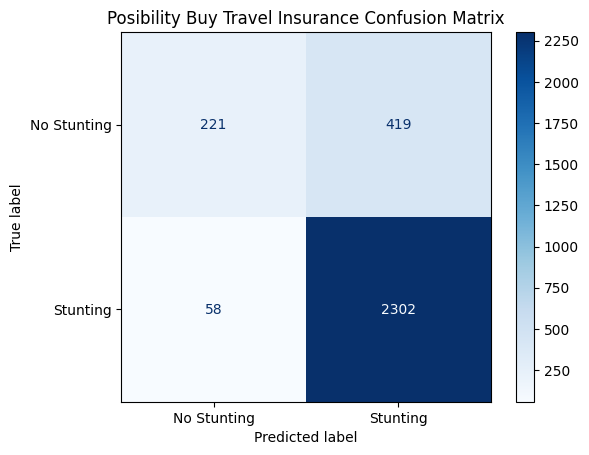

C:\Users\Pandiepie\anaconda3\envs\tf\lib\site-packages\joblib\_memmapping_reducer.py:599: UserWarning: Failed to delete temporary folder: C:\Users\PANDIE~1\AppData\Local\Temp\joblib_memmapping_folder_5268_774f3597b32242adba6575192a3e3620_19a5349f1ac74bffbb021e3b094587a4
  .format(pool_subfolder))
C:\Users\Pandiepie\anaconda3\envs\tf\lib\site-packages\joblib\_memmapping_reducer.py:599: UserWarning: Failed to delete temporary folder: C:\Users\PANDIE~1\AppData\Local\Temp\joblib_memmapping_folder_5268_774f3597b32242adba6575192a3e3620_9b74499cd1d14085b7b69446c2c82c4c
  .format(pool_subfolder))
C:\Users\Pandiepie\anaconda3\envs\tf\lib\site-packages\joblib\_memmapping_reducer.py:599: UserWarning: Failed to delete temporary folder: C:\Users\PANDIE~1\AppData\Local\Temp\joblib_memmapping_folder_5268_5e0a21c70ef3471882ed3a1efecd4279_19a5349f1ac74bffbb021e3b094587a4
  .format(pool_subfolder))
C:\Users\Pandiepie\anaconda3\envs\tf\lib\site-packages\joblib\_memmapping_reducer.py:599: UserWarning: Fai

In [60]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(grid_search, X_test, y_test, display_labels=['No Stunting', 'Stunting'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()

In [52]:
# Create a RandomForestClassifier instance with the hyperparameters
model_grid = RandomForestClassifier(max_depth=9, max_features="sqrt", max_leaf_nodes=9, n_estimators=150)

# Fit the model
model_grid.fit(X_train, y_train)

# Evaluate the model on the training and test data
print("Train score: %.2f" % (model_grid.score(X_train, y_train)))
print("Test score: %.2f" % (model_grid.score(X_test, y_test)))

# Perform other evaluation tasks if necessary
eval_classification(model_grid)


Train score: 0.86
Test score: 0.84
Accuracy (Test Set): 0.84
Precision (Test Set): 0.84
Recall (Test Set): 0.98
F1-Score (Test Set): 0.91
AUC (test-proba): 0.83
AUC (train-proba): 0.84


C:\Users\Pandiepie\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


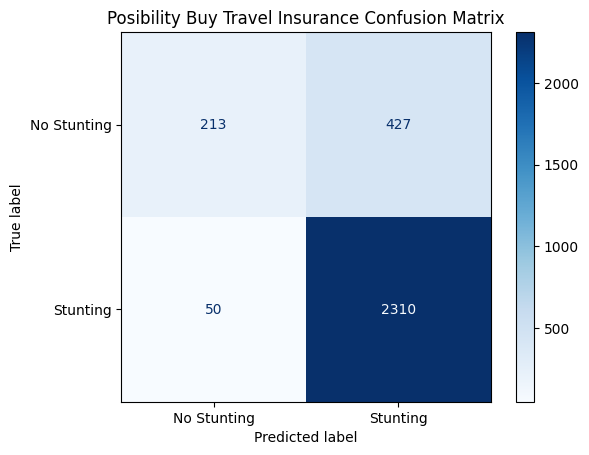

In [53]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(model_grid, X_test, y_test, display_labels=['No Stunting', 'Stunting'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()